In [2]:
import pandas as pd


In [3]:
X_train_scaled = pd.read_csv('X_train_scaled.csv')
X_test_scaled = pd.read_csv('X_test_scaled.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:

def sanitize_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = str(col).replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_').replace(' ', '_').replace(',', '')
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Sanitize column names for XGBoost compatibility using X_train_scaled and X_test_scaled
X_train_scaled = sanitize_col_names(X_train_scaled.copy())
X_test_scaled = sanitize_col_names(X_test_scaled.copy())

In [5]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Initialize XGBRegressor
xgb_regressor = XGBRegressor(random_state=42)

# Train the model with sanitized feature names and original continuous target
xgb_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb_regressor.predict(X_test_scaled)

# Calculate R-squared score
r_squared_no_pca = r2_score(y_test, y_pred)

print(f"R-squared Score (without PCA): {r_squared_no_pca:.4f}")

R-squared Score (without PCA): 0.8963


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 52581.1367
Mean Absolute Error (MAE): 165.4165


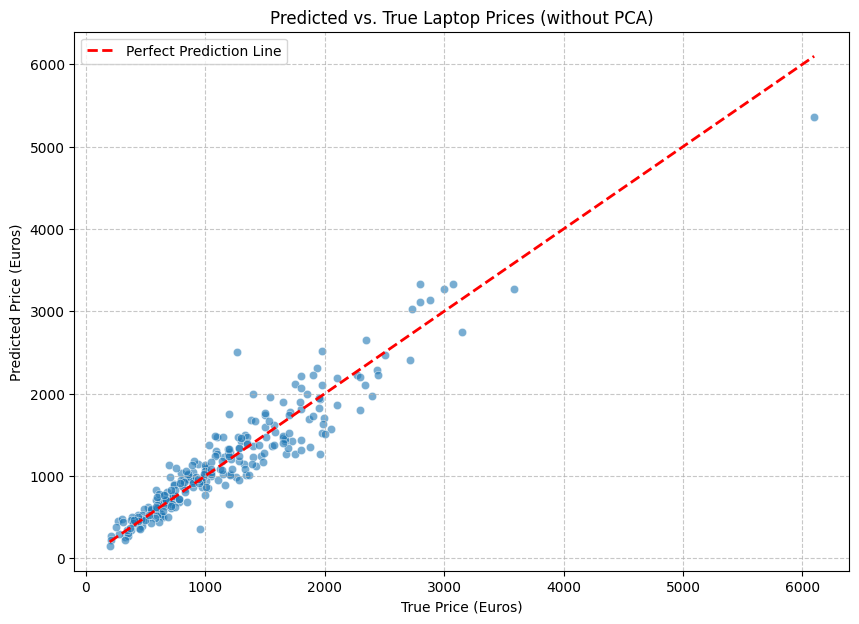

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a scatter plot of true vs. predicted values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test.squeeze(), y=y_pred, alpha=0.6)

# Add a diagonal line for perfect predictions (y=x)
plt.plot([y_test.min().item(), y_test.max().item()], [y_test.min().item(), y_test.max().item()],
         color='red', linestyle='--', lw=2, label='Perfect Prediction Line')

plt.title('Predicted vs. True Laptop Prices (without PCA)')
plt.xlabel('True Price (Euros)')
plt.ylabel('Predicted Price (Euros)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

If add PCA, less good performance because not enough features

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Identify numerical and categorical columns
numerical_cols = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage'] # Explicitly redefine from kernel state
categorical_cols = [col for col in X_train_scaled.columns if col not in numerical_cols]

X_train_numerical = X_train_scaled[numerical_cols]
X_test_numerical = X_test_scaled[numerical_cols]
X_train_categorical = X_train_scaled[categorical_cols]
X_test_categorical = X_test_scaled[categorical_cols]

n_components = 5
pca = PCA(n_components=n_components, random_state=42)

X_train_pca_numerical = pca.fit_transform(X_train_numerical)
X_test_pca_numerical = pca.transform(X_test_numerical)

X_train_pca_numerical_df = pd.DataFrame(X_train_pca_numerical,
                                       columns=[f'PC_{i+1}' for i in range(n_components)],
                                       index=X_train_scaled.index)
X_test_pca_numerical_df = pd.DataFrame(X_test_pca_numerical,
                                      columns=[f'PC_{i+1}' for i in range(n_components)],
                                      index=X_test_scaled.index)

X_train_pca = pd.concat([X_train_pca_numerical_df, X_train_categorical], axis=1)
X_test_pca = pd.concat([X_test_pca_numerical_df, X_test_categorical], axis=1)


In [ ]:

X_train_pca_reg = sanitize_col_names(X_train_pca.copy())
X_test_pca_reg = sanitize_col_names(X_test_pca.copy())


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_train_pca_reg, y_train)

y_pred = xgb_regressor.predict(X_test_pca_reg)

r_squared = r2_score(y_test, y_pred)
print(f"R-squared Score: {r_squared:.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared Score: 0.8616
Mean Squared Error (MSE): 68708.7969
Mean Absolute Error (MAE): 178.3309


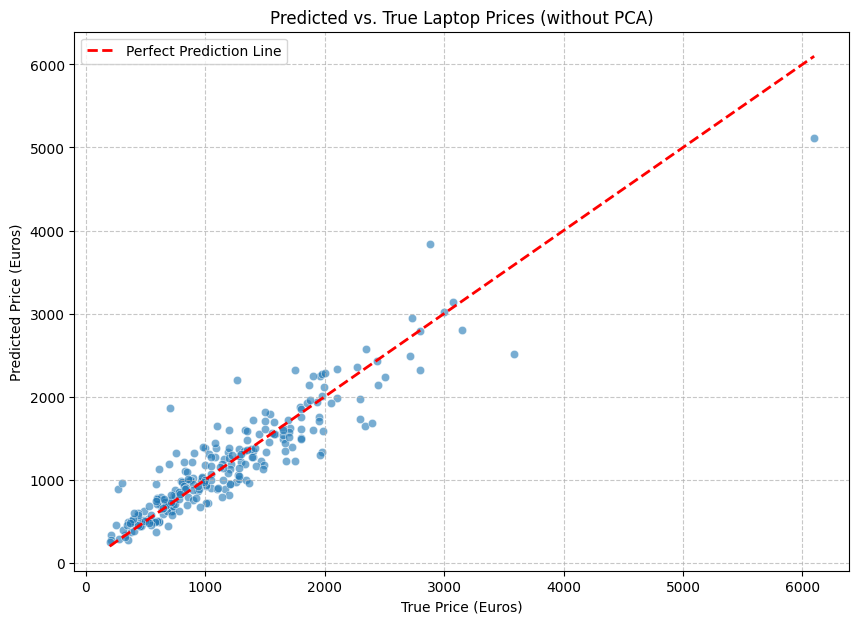

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a scatter plot of true vs. predicted values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test.squeeze(), y=y_pred, alpha=0.6)

# Add a diagonal line for perfect predictions (y=x)
plt.plot([y_test.min().item(), y_test.max().item()], [y_test.min().item(), y_test.max().item()],
         color='red', linestyle='--', lw=2, label='Perfect Prediction Line')

plt.title('Predicted vs. True Laptop Prices (without PCA)')
plt.xlabel('True Price (Euros)')
plt.ylabel('Predicted Price (Euros)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()